In [ ]:
pip install astropy

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from DELCgen import *
import scipy.stats as st

In [ ]:
def PL(v,a,N):
   
    out = N*v**-a
    return out

In [ ]:
import inspect
# Bending power law params
#A,v_bend,a_low,a_high,c = 0.03, 2.3e-4, 1.1, 2.2, 0.009 
print(inspect.getsource(BendingPL))

def BendingPL(v,A,v_bend,a_low,a_high,c):
    '''
    Bending power law function - returns power at each value of v, 
    where v is an array (e.g. of frequencies)
    
    inputs:
        v (array)       - input values
        A (float)       - normalisation 
        v_bend (float)  - bending frequency
        a_low ((float)  - low frequency index
        a_high float)   - high frequency index
        c (float)       - intercept/offset
    output:
        out (array)     - output powers
    '''
    numer = v**-a_low
    denom = 1 + (v/v_bend)**(a_high-a_low)
    out = A * (numer/denom) + c
    return out



In [ ]:
print(st.lognorm)

In [ ]:
# Bending power law params
A,v_bend,a_low,a_high,c = 1.0,300,2.1,2.3,0.1
sigma,loc,scale = 0.3,0.0,7.4
a,N = 2.1,1.0
delc = Simulate_DE_Lightcurve(BendingPL,(A,v_bend,a_low,a_high,c),st.lognorm,(sigma,loc,scale),tbin = 1800, 
                              LClength = 48000)

In [ ]:
# save the simulated light curve as a txt file
delc.Save_Lightcurve('lc30mins.dat')

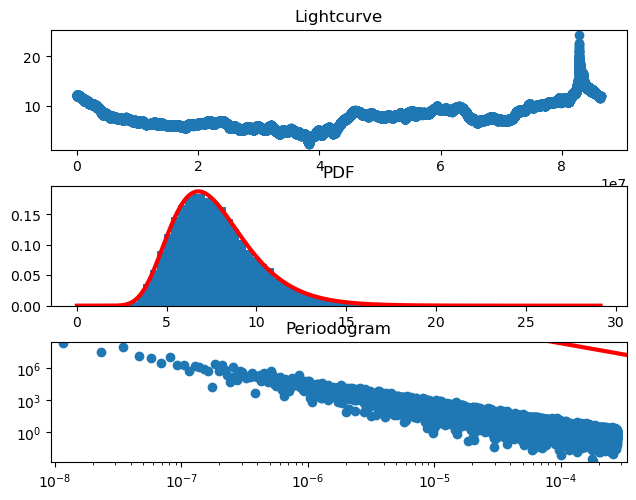

In [ ]:
delc.Plot_Stats()